In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 45kB/s 


In [ ]:
!nvidia-smi

Tue May  4 16:40:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/croppredictiondataset/train'
valid_path = '/content/drive/MyDrive/croppredictiondataset/valid'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/croppredictiondataset/train/*')
folders

['/content/drive/MyDrive/croppredictiondataset/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___Late_blight',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___healthy',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___Early_blight',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/croppredictiondataset/train/Tomato___Septoria_leaf_spot']

In [ ]:
x = Flatten()(inception.output)
x

<KerasTensor: shape=(None, 51200) dtype=float32 (created by layer 'flatten_1')>

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/croppredictiondataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 14371 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/croppredictiondataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')



Found 8559 images belonging to 10 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
899/899 [==============================] - 5804s 6s/step - loss: 5.0667 - accuracy: 0.5830 - val_loss: 3.3098 - val_accuracy: 0.7520
Epoch 2/10
899/899 [==============================] - 210s 233ms/step - loss: 3.4762 - accuracy: 0.7678 - val_loss: 3.2081 - val_accuracy: 0.7867
Epoch 3/10
899/899 [==============================] - 211s 234ms/step - loss: 3.0885 - accuracy: 0.8130 - val_loss: 5.5080 - val_accuracy: 0.7456
Epoch 4/10
899/899 [==============================] - 209s 232ms/step - loss: 3.1840 - accuracy: 0.8301 - val_loss: 3.4831 - val_accuracy: 0.8216
Epoch 5/10
899/899 [==============================] - 210s 234ms/step - loss: 2.7891 - accuracy: 0.8526 - val_loss: 4.8889 - val_accuracy: 0.7985
Epoch 6/10
899/899 [==============================] - 208s 232ms/step - loss: 2.8590 - accuracy: 0.8553 - val_loss: 6.2114 - val_accuracy: 0.7793
Epoch 7/10
899/899 [==============================] - 208s 231ms/step - loss: 2.6623 - accuracy: 0.8739 - val_loss: 8.0491 - v

In [ ]:


import matplotlib.pyplot as plt



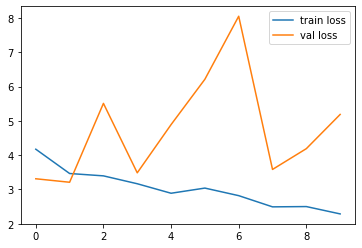

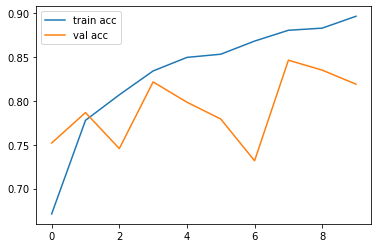

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.7907436e-36, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9983585e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [9.8955729e-26, 2.0494056e-23, 2.4727920e-37, ..., 0.0000000e+00,
        9.9998260e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        5.9846159e-30, 0.0000000e+00]], dtype=float32)

In [ ]:


import numpy as np
y_pred = np.argmax(y_pred, axis=1)



In [ ]:
y_pred

array([0, 0, 0, ..., 8, 8, 5])

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

Confusion Matrix
[[ 85  63  82  77  76  62 111  94 123  84]
 [ 91  67  92  70 100  71 110  88 126  73]
 [ 77  60  83  70  92  60 134  64 124  83]
 [ 87  49 100  68 101  56 126  79 106  82]
 [ 80  63  78  63  86  61 109  82 122  70]
 [ 92  67  73  64  82  64 123  72 125  81]
 [ 93  65 108  51  94  54 112  82 112  76]
 [ 96  65  98  70  90  59 108 105 111  78]
 [ 92  42 102  75  86  48 112  95 120  76]
 [ 91  61  87  76 110  54 120  76 122  84]]


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/croppredictiondataset/valid/Tomato___Leaf_Mold/0185befe-f0b5-4848-9677-f33c2237f4e9___Crnl_L.Mold 8729_180deg.JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255
x

array([[[0.33333334, 0.3137255 , 0.39215687],
        [0.28627452, 0.26666668, 0.34509805],
        [0.40784314, 0.3882353 , 0.46666667],
        ...,
        [0.4509804 , 0.44313726, 0.5372549 ],
        [0.46666667, 0.45882353, 0.5529412 ],
        [0.47843137, 0.47058824, 0.5647059 ]],

       [[0.47843137, 0.45882353, 0.5372549 ],
        [0.4745098 , 0.45490196, 0.53333336],
        [0.3529412 , 0.33333334, 0.4117647 ],
        ...,
        [0.43529412, 0.42745098, 0.52156866],
        [0.4392157 , 0.43137255, 0.5254902 ],
        [0.44705883, 0.4392157 , 0.53333336]],

       [[0.3372549 , 0.31764707, 0.39607844],
        [0.44313726, 0.42352942, 0.5019608 ],
        [0.40784314, 0.3882353 , 0.46666667],
        ...,
        [0.45490196, 0.44705883, 0.5411765 ],
        [0.44705883, 0.4392157 , 0.53333336],
        [0.44705883, 0.4392157 , 0.53333336]],

       ...,

       [[0.53333336, 0.54509807, 0.61960787],
        [0.53333336, 0.54509807, 0.61960787],
        [0.5647059 , 0

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:


model.predict(img_data)



array([[9.1858718e-30, 3.8092512e-08, 1.0000000e+00, 7.7529714e-16,
        4.4296133e-14, 4.7206839e-20, 8.6399827e-19, 7.0325671e-34,
        2.3372494e-14, 5.8776058e-21]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([2])

In [ ]:
#!zip -r /content/inception.zip /content/inception.model

In [ ]:
class_dict = training_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}